In [53]:
import os
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

def Euclidean(x,y):
    return np.sqrt((y[0]-x[0])**2 + (y[1] - x[1])**2)

In [54]:
# For webcam input:
from ast import ListComp

datadirectory = 'data'
PoseData = list()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(os.path.join('..', datadirectory, 'MariaDancingSequence.webm'))
i = 0
imageName = "MariaMovementSequence_27Sept_test"
MaxRecordings = 10
pose = mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)  # as pose:

while cap.isOpened():
  
  i += 1
  
  success, image = cap.read()
  if not success:
    print("Ignoring empty camera frame.")
    # If loading a video, use 'break' instead of 'continue'.
    break

  # Draw the pose annotation on the image.
  image.flags.writeable = True
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  results = pose.process(image)
  mp_drawing.draw_landmarks(
      image,
      results.pose_landmarks,
      mp_pose.POSE_CONNECTIONS,
      landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
  
  newData = {coord + str(j):lm.__getattribute__(coord)  for j, lm in enumerate(results.pose_landmarks.landmark) for coord in ["x", "y"]}
  PoseData.append(newData)

  # Flip the image horizontally for a selfie-view display.
  cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
  if (cv2.waitKey(5) & 0xFF == 27) or i>MaxRecordings :
    break
cap.release()
df = pd.DataFrame(PoseData)
df.to_csv(os.path.join("..","data", "csv", imageName + ".csv"))
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [68]:
# results.pose_landmarks.landmark

In [70]:
import cv2
images = []
cap = cv2.VideoCapture(os.path.join('..', 'data', 'MariaDancingSequence.webm'))
# for i in range(315):
success = True
lastSuccessfulFrame = 0
numberOfsuccessivsUnsuccesses = 20
unsuccesses = 0
frame = 0
while unsuccesses < numberOfsuccessivsUnsuccesses:
  success, image = cap.read()
  # if success and (i>=275 and i<=315):
  #   images.append(image)
  # else:
  #   images.append('empty')

  if not success:
    unsuccesses += 1
  else:
    unsuccesses = 0
    lastSuccessfulFrame = frame

  frame += 1

numberOfImages = lastSuccessfulFrame

In [74]:
(numberOfImages - 1) / (2 * 60 + 42)

15.018518518518519

In [2]:
import pandas as pd

In [69]:
imageName = "MariaMovementSequence_27Sept"
df = pd.read_csv(
    os.path.join("..","data", imageName + ".csv"), 
    header=0,
    index_col=0)

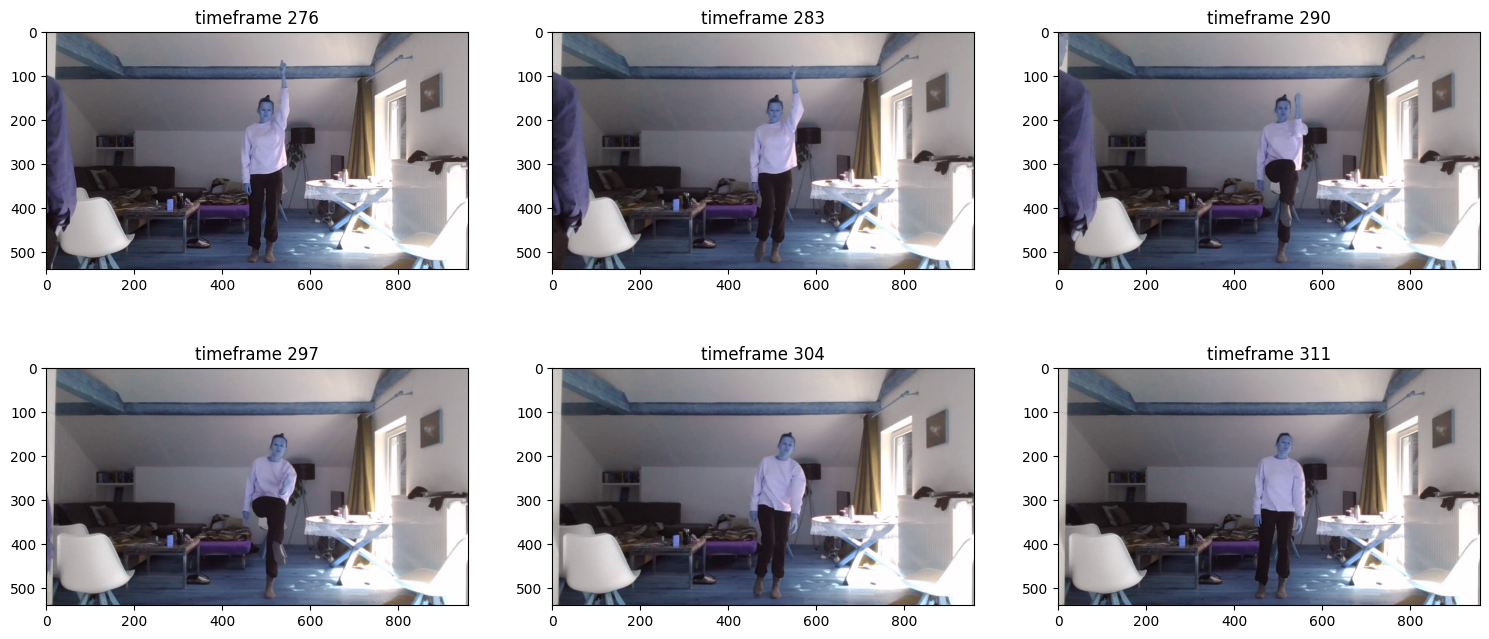

In [50]:
import matplotlib.pyplot as plt
startAt = 276
steps = 7
ncols = 3
fig, axes = plt.subplots(nrows=2, ncols=ncols)
for i in range(6):
    row = round(np.floor(i/ncols))
    col = i % ncols
    timeframe = (startAt + (i * steps))
    axes[row,col].imshow(images[timeframe])
    axes[row,col].set_title('timeframe {}'.format(timeframe))
# axes[0,1].imshow(images[(startAt + (1 * steps))])
# axes[0,2].imshow(images[(startAt + (2 * steps))])
# axes[1,0].imshow(images[(startAt + (3 * steps))])
# axes[1,1].imshow(images[(startAt + (4 * steps))])
# axes[1,2].imshow(images[(startAt + (5 * steps))])
fig.set_size_inches(18.5, 8.0)
plt.show()

In [67]:
# df[df.columns.str.startswith('x')]
goodColumns = df.columns.str.startswith('x')
df[df.columns[df.columns.str.startswith('y')]]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
0,0.512252,0.517253,0.520392,0.522665,0.507995,0.505198,0.502239,0.526685,0.499497,0.518059,...,0.532989,0.490393,0.530789,0.496049,0.528918,0.499670,0.527764,0.502496,0.526807,0.491044
1,0.512283,0.517276,0.520395,0.522657,0.508107,0.505306,0.502347,0.526622,0.499495,0.518063,...,0.533235,0.490589,0.531105,0.496045,0.529115,0.499611,0.527787,0.502500,0.526463,0.491175
2,0.512505,0.517423,0.520456,0.522661,0.508389,0.505561,0.502704,0.526622,0.499528,0.518194,...,0.533328,0.490728,0.531363,0.496039,0.529288,0.499581,0.527794,0.502508,0.526357,0.491520
3,0.512667,0.517551,0.520507,0.522666,0.508595,0.505742,0.502946,0.526625,0.499568,0.518306,...,0.533504,0.490923,0.531598,0.496038,0.529545,0.499567,0.527853,0.502523,0.526335,0.492056
4,0.512867,0.517763,0.520597,0.522687,0.508863,0.505938,0.503215,0.526664,0.499636,0.518417,...,0.533652,0.491102,0.531786,0.496043,0.529662,0.499552,0.527873,0.502531,0.526302,0.492467
5,0.513027,0.518011,0.520722,0.522747,0.509123,0.506114,0.503444,0.526830,0.499736,0.518532,...,0.533760,0.491304,0.531962,0.496129,0.529703,0.499567,0.527874,0.502550,0.526293,0.493269
6,0.513114,0.518173,0.520816,0.522804,0.509271,0.506204,0.503561,0.527040,0.499795,0.518628,...,0.533931,0.491457,0.532003,0.496184,0.529792,0.499567,0.527921,0.502551,0.526224,0.493550
7,0.513153,0.518261,0.520871,0.522840,0.509397,0.506303,0.503691,0.527202,0.499911,0.518675,...,0.534024,0.491568,0.532010,0.496243,0.529843,0.499565,0.527936,0.502546,0.526181,0.493717
8,0.513389,0.518517,0.521036,0.523019,0.509656,0.506505,0.503929,0.527593,0.500106,0.518902,...,0.534183,0.491682,0.532033,0.496245,0.529941,0.499526,0.527993,0.502528,0.526178,0.493954
9,0.513897,0.518988,0.521331,0.523436,0.510164,0.506899,0.504339,0.528176,0.500399,0.519391,...,0.534319,0.491839,0.532033,0.496250,0.530008,0.499431,0.527996,0.502493,0.526041,0.494188


<AxesSubplot:>

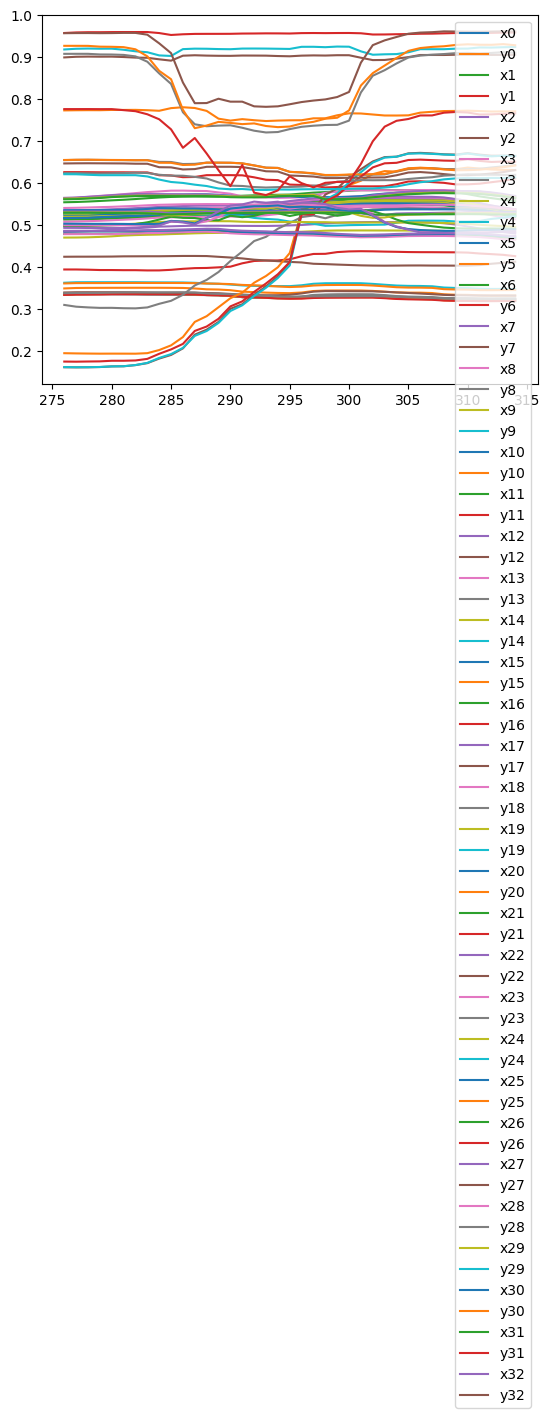

In [51]:
ax = df[(df.index>275) & (df.index<315)].plot()
ax. 

<AxesSubplot:>

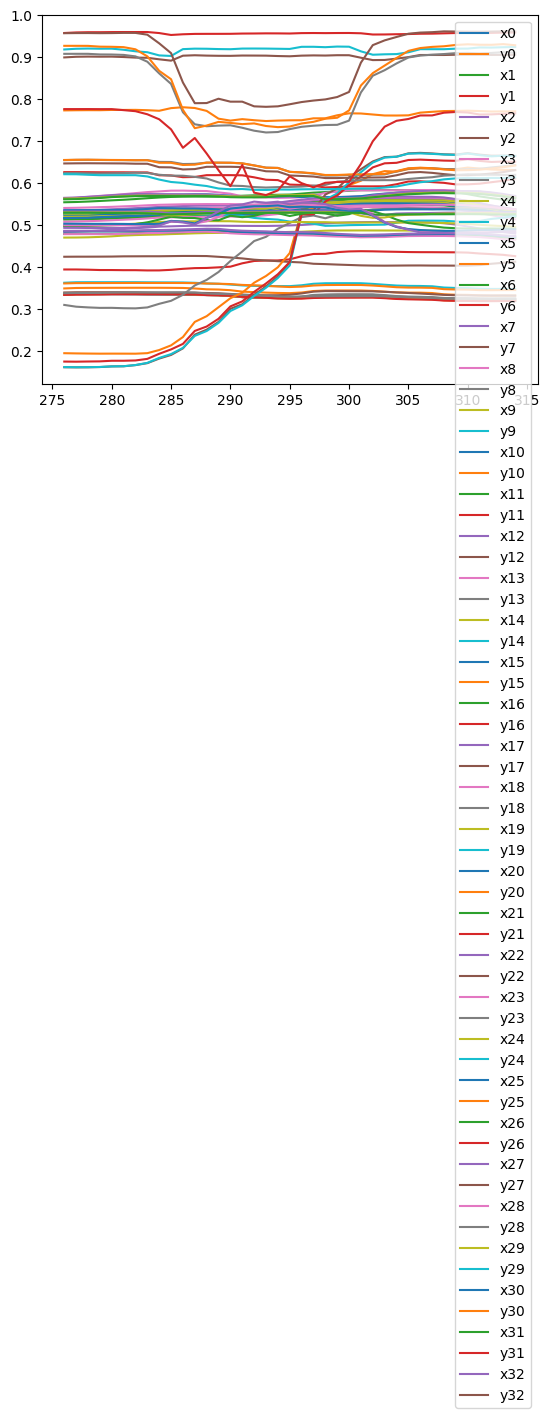

In [18]:
df[(df.index>275) & (df.index<315)].plot()